### Step 1. Open the data file and study the general information. 

In [2]:
import pandas as pd
data=pd.read_csv('/datasets/real_estate_data_us.csv',sep='\t')
data.head()

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,...,bike_parking,is_studio,is_open_plan,locality_name,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000
0,2019-03-07T00:00:00,NaN,260000.0,3,25.0,51.0,108.0,NaN,2.70,16.0,...,NaN,False,False,Saint Petersburg,18863.0,16028.0,482.0,1.0,755.0,2.0
1,2018-12-04T00:00:00,81.0,67000.0,1,11.0,18.6,40.4,2.0,NaN,11.0,...,NaN,False,False,Shushary village,12817.0,18603.0,NaN,0.0,NaN,0.0
2,2015-08-20T00:00:00,558.0,103920.0,2,8.3,34.3,56.0,0.0,NaN,5.0,...,NaN,False,False,Saint Petersburg,21741.0,13933.0,90.0,1.0,574.0,2.0
3,2015-07-24T00:00:00,424.0,1298000.0,3,NaN,NaN,159.0,0.0,NaN,14.0,...,NaN,False,False,Saint Petersburg,28098.0,6800.0,84.0,2.0,234.0,3.0
4,2018-06-19T00:00:00,121.0,200000.0,2,41.0,32.0,100.0,NaN,3.03,14.0,...,NaN,False,False,Saint Petersburg,31856.0,8098.0,112.0,2.0,48.0,1.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
date_posted          23699 non-null object
days_listed          20518 non-null float64
last_price           23699 non-null float64
bedrooms             23699 non-null int64
kitchen_area         21421 non-null float64
living_area          21796 non-null float64
total_area           23699 non-null float64
balconies            12180 non-null float64
ceiling_height       14504 non-null float64
floors_total         23613 non-null float64
floor                23699 non-null int64
total_images         23699 non-null int64
bike_parking         2775 non-null object
is_studio            23699 non-null bool
is_open_plan         23699 non-null bool
locality_name        23650 non-null object
airport_dist         18157 non-null float64
city_center_dist     18180 non-null float64
park_dist            8079 non-null float64
parks_within_3000    18181 non-null float64
pond_dist            9110 no

A lot of columns contain missing values and and many of them have wrong data type for example balconies, it contains data on number of balconies which can be integer only. We fill in missing values and change data type where required.

### Step 2. Data preprocessing

We will change the data type of the following variables to integer type as they contain integer values: balconies,days_listed,floors_total. 
Datatype of date_posted will be changed to pandas datetime.
Bike_parking to bool as it contains only true and false as values.

The balconies column contains missing values because there probably aren't any. So we will replace missing values with 0.

In [4]:
data['balconies'].fillna(0,inplace=True)
data['balconies'].unique()
data['balconies']=data['balconies'].astype('int')

Since the data is of sales ads each property must have been listed for some days. The mising values in this column can be attributed to human error. Hence we will replace missing values with suitable average value.

In [5]:
print(data['days_listed'].min())
print(data['days_listed'].max())

1.0
1580.0


In [6]:
print(data['days_listed'].value_counts())

45.0      880
60.0      538
7.0       234
30.0      208
90.0      204
         ... 
1110.0      1
1049.0      1
951.0       1
693.0       1
773.0       1
Name: days_listed, Length: 1141, dtype: int64


In [7]:
print(data['days_listed'].median())
print(data['days_listed'].mean())

95.0
180.88863436982163


The number of days listed varies greatly and hence there is a huge difference between mean and median values. Therefore we will replace the missing values with the median value.

In [8]:
data['days_listed'].fillna(data['days_listed'].median(),inplace=True)
data['days_listed']=data['days_listed'].astype('int')     # changing data type to int

In [9]:
print(data['ceiling_height'].mean())
print(data['ceiling_height'].median())

2.77149889685604
2.65


The ceiling height is missing because the user did not enter it. There is no other way to explain it. We replace missing values with median.

In [10]:
data['ceiling_height'].fillna(data['ceiling_height'].median(),inplace=True)  

In [11]:
data['date_posted']=pd.to_datetime(data['date_posted'],format='%Y-%m-%dT%H:%M:%S')      #changing data type to date time 

In [12]:
data['bike_parking']=data['bike_parking'].astype('bool')                                # changing data type to boolean

In [13]:
rooms_to_area=data.groupby('bedrooms')[['living_area','kitchen_area']].mean().to_dict()

print(rooms_to_area['kitchen_area'][0])

nan


In [15]:
data['bedrooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: bedrooms, dtype: int64

In [14]:
rooms_to_area=data.groupby('bedrooms')[['living_area','kitchen_area']].mean().to_dict()
rooms_to_area

{'living_area': {0: 18.865245901639348,
  1: 17.89355170546834,
  2: 31.736849164747895,
  3: 47.38794074040251,
  4: 66.9832231395776,
  5: 100.0092465547945,
  6: 130.98363636363635,
  7: 163.56415094339619,
  8: 168.6833333333333,
  9: 190.25714285714284,
  10: 165.5666666666667,
  11: 133.9,
  12: 409.7,
  14: 195.15,
  15: 409.0,
  16: 180.0,
  19: 264.5},
 'kitchen_area': {0: nan,
  1: 9.55011784278388,
  2: 9.979584133955523,
  3: 11.308579925650543,
  4: 13.664033302497677,
  5: 18.367649122807016,
  6: 21.04876288659794,
  7: 21.998076923076926,
  8: 24.866666666666667,
  9: 25.071428571428573,
  10: 22.866666666666664,
  11: 12.600000000000001,
  12: 112.0,
  14: 21.25,
  15: 100.0,
  16: 13.0,
  19: 27.6}}

In [13]:
import numpy as np

rooms_to_area=data.groupby('bedrooms')[['living_area','kitchen_area']].mean().to_dict()
areas=['living_area','kitchen_area']
for i in areas:
    def filler(row):
        if np.isnan(row[i]):
            return rooms_to_area[i][row["bedrooms"]]
        return row[i]

    data[i] = data.apply(filler, axis=1)


In [14]:
data[data['bedrooms']==0]['total_area'].mean()

29.279746192893406

Fill missing kitchen area values for 0 bedrooms by 0

In [15]:
data['kitchen_area']=data['kitchen_area'].fillna(0)

In [16]:
data['parks_within_3000'].fillna(0,inplace=True)   


If parks within 3000 is empty it is probably because there aren't any.So we replaced it with 0.

In [17]:
avg=data[(data['parks_within_3000']>0) & (data['park_dist'].notnull())]['park_dist'].mean()
def park(row):
    if np.isnan(row['park_dist']):
        if row['parks_within_3000']>0:
            return avg
        return 3000
    return row['park_dist']

data['park_dist']=data.apply(park,axis=1)
    

In [18]:
data['ponds_within_3000'].fillna(0,inplace=True)
avg2=data[(data['ponds_within_3000']>0) & (data['pond_dist'].notnull())]['pond_dist'].mean()
def pond(row):
    if np.isnan(row['pond_dist']):
        if row['ponds_within_3000']>0:
            return avg2
        return 3000
    return row['pond_dist']

data['pond_dist']=data.apply(park,axis=1)

if ponds_within_3000 is empty it is probably because there aren't any. So we filled missing values with 0. 
If ponds within 3000 is 0 we fill missing values in pond_dist with 0 and if it is greater than 0 then we replaced it with mean value.

In [19]:
data.duplicated().sum()                 #checking for duplicates

0

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
date_posted          23699 non-null datetime64[ns]
days_listed          23699 non-null int64
last_price           23699 non-null float64
bedrooms             23699 non-null int64
kitchen_area         23699 non-null float64
living_area          23699 non-null float64
total_area           23699 non-null float64
balconies            23699 non-null int64
ceiling_height       23699 non-null float64
floors_total         23613 non-null float64
floor                23699 non-null int64
total_images         23699 non-null int64
bike_parking         23699 non-null bool
is_studio            23699 non-null bool
is_open_plan         23699 non-null bool
locality_name        23650 non-null object
airport_dist         18157 non-null float64
city_center_dist     18180 non-null float64
park_dist            23699 non-null float64
parks_within_3000    23699 non-null float64
pond_dist            236

the columns containing distances from different places were obtained automatically from map. These columns contain missing values because of mistakes made while data collection. Maybe some of the places are too remote and hence their distances from airport or city center could not be found. Missing values can be important indicators in this case.
There is no way to find the total number of floors so we leave it as it is.

### Step 3. Make calculations and add them to the table

In [21]:
data['price_per_sqm']=data['last_price']/data['total_area']

In [22]:
data['weekday']=data['date_posted'].dt.weekday              #weekday of publication date

In [23]:
data['month']=data['date_posted'].dt.month                #month of publication date

In [24]:
data['year']=data['date_posted'].dt.year                   #year of publication date

In [25]:
def find_floor(row):                                 #floor number for each apartment
    floor_no=row['floor']
    total=row['floors_total']
    if floor_no ==1:
        return 'first'
    if floor_no==total:
        return 'last'
    return 'other'
data['on_floor']=data.apply(find_floor,axis=1)


In [26]:
#ratio of kitchen area to total area
data['kitchen_ratio']=data['kitchen_area']/data['total_area']

In [27]:
#ratio of living area to total area
data['living_ratio']=data['living_area']/data['total_area']

### Step 4. Conduct exploratory data analysis:

In [28]:
data.describe()

,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,floor,...,park_dist,parks_within_3000,pond_dist,ponds_within_3000,price_per_sqm,weekday,month,year,kitchen_ratio,living_ratio
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23613.000000,23699.000000,...,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000
mean,169.360226,1.308310e+05,2.070636,10.479053,34.441157,60.348651,0.591080,2.724358,10.673824,5.892358,...,2144.614119,0.469049,2144.614119,0.590911,1988.433127,2.569307,6.400101,2017.367146,0.188456,0.565565
std,206.535633,2.177403e+05,1.078405,5.723125,21.802121,35.654083,0.959298,0.988298,6.597173,4.885249,...,1206.088326,0.748534,1206.088326,0.883999,1006.136035,1.789082,3.491561,1.039771,0.076299,0.112158
min,1.000000,2.440000e+02,0.000000,0.000000,2.000000,12.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,2.238532,0.000000,1.000000,2014.000000,0.000000,0.021583
25%,45.000000,6.800000e+04,1.000000,7.200000,18.400000,40.000000,0.000000,2.600000,5.000000,2.000000,...,601.000000,0.000000,601.000000,0.000000,1531.709403,1.000000,3.000000,2017.000000,0.133962,0.492063
50%,95.000000,9.300000e+04,2.000000,9.550118,30.300000,52.000000,0.000000,2.650000,9.000000,4.000000,...,3000.000000,0.000000,3000.000000,0.000000,1900.000000,3.000000,6.000000,2017.000000,0.174757,0.567308
75%,199.000000,1.360000e+05,3.000000,11.600000,42.700000,69.900000,1.000000,2.700000,16.000000,8.000000,...,3000.000000,1.000000,3000.000000,1.000000,2285.126529,4.000000,10.000000,2018.000000,0.233926,0.639649
max,1580.000000,1.526000e+07,19.000000,112.000000,409.700000,900.000000,5.000000,100.000000,60.000000,33.000000,...,3190.000000,3.000000,3190.000000,3.000000,38150.000000,6.000000,12.000000,2019.000000,0.795843,1.625886


Most of the columns contain outliers.

# Histograms for different factors affecting price

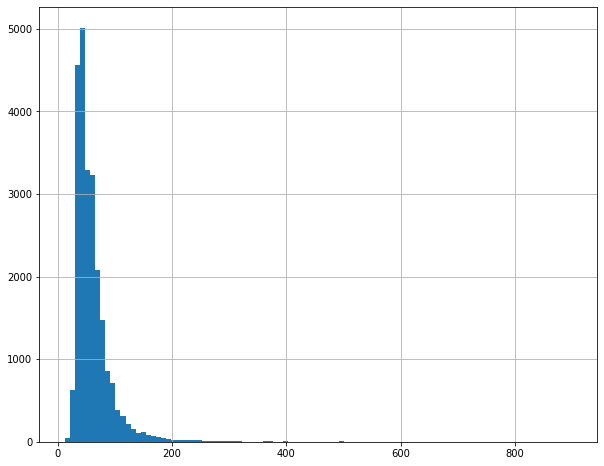

In [29]:
data['total_area'].hist(bins=100,figsize=(10,8))

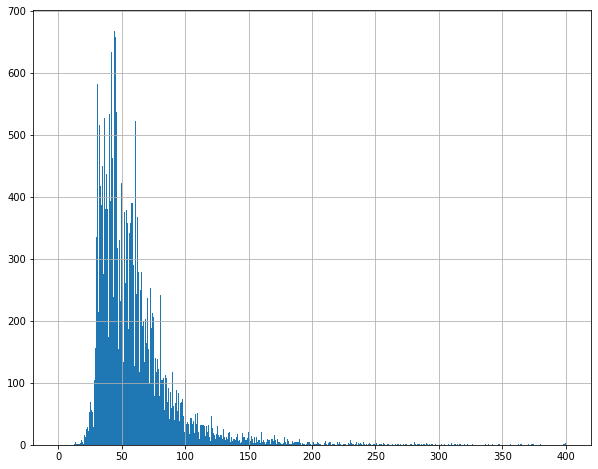

In [31]:
data['total_area'].hist(bins=500,range=(0,400),figsize=(10,8))

The peak of total area is at less than 50 square meters.The distribution has a long tail because of outliers.The maximum total area is 900 sq.m . 

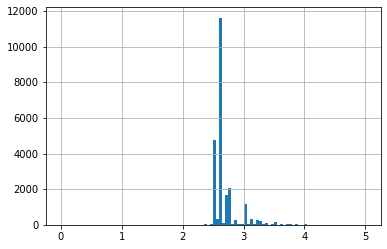

In [32]:
data['ceiling_height'].hist(bins=100,range=(0,5),figsize=(6,4))

In [33]:
data[data['ceiling_height']<5]['ceiling_height'].count()/data['ceiling_height'].count()

0.9984387526899869

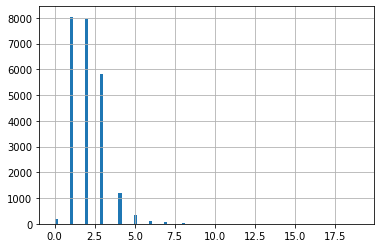

In [34]:
data['bedrooms'].hist(bins=100)

75% of the apartments have 3 bedrooms in the data. Apartments with more than 7 bedrooms are very rare.

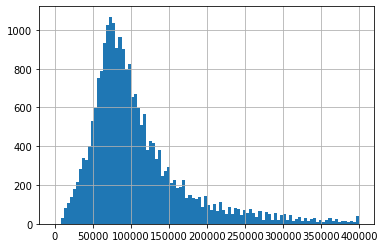

In [35]:
data['last_price'].hist(bins=100,range=(0,400000))

Price has a long tail with values extending upta 6mil. But most of the apartments are priced between 50k and 100k. Price looks like a skewed normal curve.

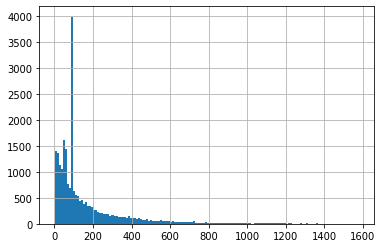

In [36]:
data['days_listed'].hist(bins=150)

Number of days listed has long tail extending upto 1580. Most of the apartments were listed for less than 400 days. Poisson distribution can be fitted after removing outliers and not considering the missing values replaced by median.

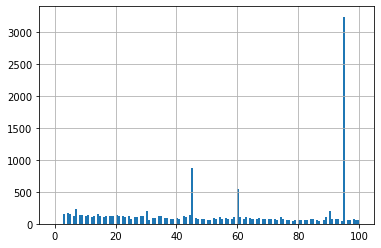

In [37]:
data['days_listed'].hist(bins=150,range=(0,100))      

Number of days listed less than 40 are uniformly distributed. The peak is at 95 because we replaced missing values by 95.

In [38]:
data['days_listed'].describe()

count    23699.000000
mean       169.360226
std        206.535633
min          1.000000
25%         45.000000
50%         95.000000
75%        199.000000
max       1580.000000
Name: days_listed, dtype: float64

In [39]:
print(data[data['days_listed']<7]['days_listed'].count()/23699)
print(data[data['days_listed']>1000]['days_listed'].count()/23699)

0.025908266171568422
0.01164606101523271


Sales which were too quick, took too long, average time for sale:
Mean is double the value of median. This is because the data contains outliers. We can say that on an  average it takes 95 days to complete a sale. Only 3% of apartments in our data were sold within 7 days so a sale can be considered quick for less than 20 days. 75% of the apartments were sold within 199 days but the histogram shows significant frequency for 800 days as well. So we can say a sale took too long if the apartment was listed for more than 1000 days.

In [283]:
data[data['total_area']>200]['total_area'].count()/len(data)

0.009578463226296468

If we remove the data for which total area is more than 200 sq. m we will loose less than 1% of data. This will not affect our analysis.

In [40]:
data=data.query('total_area < 200')      #removing outliers from total area

We remove rows which have ceiling_height less than 1 and more than 5 because such rows are very few as seen from the histogram also these values seem impractical. They seem errors made while entering data.

In [41]:
data=data.query('ceiling_height>1 and ceiling_height<5')         #removing outliers from ceiling height

In [42]:
data=data.query('days_listed<1200')                 #removing outliers from days_listed

In [43]:
data.describe()

,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,floor,...,park_dist,parks_within_3000,pond_dist,ponds_within_3000,price_per_sqm,weekday,month,year,kitchen_ratio,living_ratio
count,23345.000000,2.334500e+04,23345.000000,23345.000000,23345.000000,23345.000000,23345.000000,23345.000000,23261.000000,23345.000000,...,23345.000000,23345.000000,23345.000000,23345.000000,23345.000000,23345.000000,23345.000000,23345.000000,23345.000000,23345.000000
mean,164.077147,1.200892e+05,2.032555,10.293818,33.192679,58.071567,0.592547,2.691318,10.721551,5.905633,...,2154.431441,0.460141,2154.431441,0.581838,1966.683079,2.569886,6.400857,2017.380338,0.189379,0.565494
std,192.876819,1.235073e+05,0.994400,5.206618,17.215204,26.385260,0.958582,0.205888,6.605495,4.895039,...,1202.215350,0.738609,1202.215350,0.876838,907.686202,1.790834,3.489205,1.026674,0.076045,0.111516
min,1.000000,2.440000e+02,0.000000,0.000000,2.000000,12.000000,0.000000,1.200000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,2.238532,0.000000,1.000000,2014.000000,0.000000,0.021583
25%,45.000000,6.800000e+04,1.000000,7.200000,18.300000,40.000000,0.000000,2.600000,5.000000,2.000000,...,608.000000,0.000000,608.000000,0.000000,1530.000000,1.000000,3.000000,2017.000000,0.134831,0.492063
50%,95.000000,9.200000e+04,2.000000,9.550118,30.100000,51.700000,0.000000,2.650000,9.000000,4.000000,...,3000.000000,0.000000,3000.000000,0.000000,1896.551724,3.000000,6.000000,2017.000000,0.175439,0.566893
75%,195.000000,1.336200e+05,3.000000,11.400000,42.000000,68.700000,1.000000,2.700000,16.000000,8.000000,...,3000.000000,1.000000,3000.000000,1.000000,2276.176024,4.000000,10.000000,2018.000000,0.234783,0.639055
max,1199.000000,6.600000e+06,11.000000,93.200000,164.700000,199.200000,5.000000,4.800000,60.000000,33.000000,...,3190.000000,3.000000,3190.000000,3.000000,34736.842105,6.000000,12.000000,2019.000000,0.795843,1.625886


In [44]:
data[data['last_price']>1000000]['last_price'].count()/len(data)

0.0020561147997429858

Price more than 1 mil is extremely rare. hence we remove these values from the data

In [45]:
data=data.query('last_price<1000000')      #removing outliers from price

Studing these histograms we can say that the apartments in our data are neither luxury apartments not very small size apartments. Although small size apartments are there in our data but they are not many. All the histograms first increase reach a peak and then start falling with rather long tails for most of them. The data contains outliers and rare values for almost all columns which we have tried to get rid of.  

# Plots between publication date and price

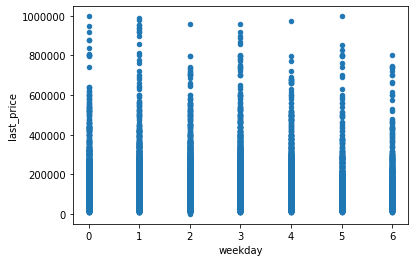

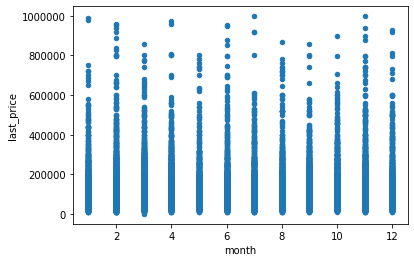

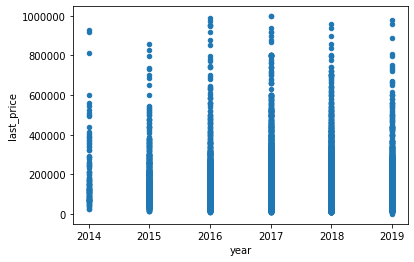

In [48]:
time=['weekday','month','year']
for x in time:
    data.plot(y='last_price',x=x,kind='scatter')

The scatter plot between price and weekday shows that on all days high price reaching upto 1 mil was recorded except for sunday. Price does not seem to depend on day of the week 

Any significant relation between month and price does seem to be there.

For 2014 only 3 houses were sold for 800k and above. For 2015 as well the price is not very high, not reaching upto 1 mil. We can see the effect of inflation as  high prices(above 800k) were frequently recorded for 2016 and ahead.

In [49]:
#grouping price by year
time_data=data.pivot_table(index='year',values='last_price',aggfunc=['median','max','std'])
time_data

,median,max,std
,last_price,last_price,last_price
year,,,
2014,143650.0,928481.0,176367.749325
2015,102612.0,860000.0,102719.123697
2016,90000.0,990000.0,98646.135722
2017,90000.0,998000.0,91439.519410
2018,91000.0,960000.0,83778.905756
2019,100000.0,980000.0,91200.329124


# Scatter plots between price and different factors 

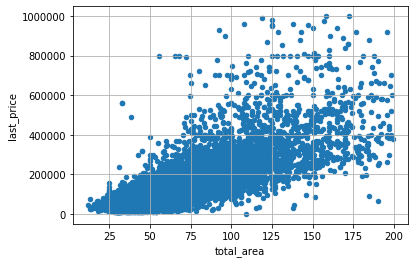

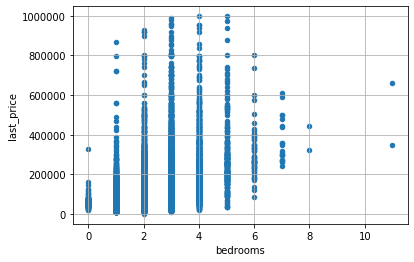

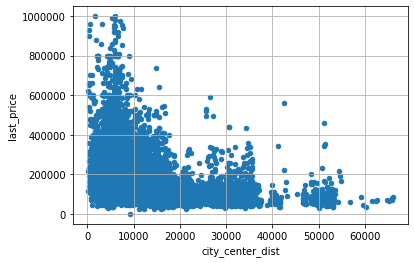

In [51]:
factors=['total_area','bedrooms','city_center_dist']
for f in factors:
    data.plot(x=f,y='last_price',kind='scatter',grid=True)

The price increases as the total_area increases.The graph between price and total_area shows a few unrealistic values. An apartment which has an area of about 52sq.m. has a price of 800k, few apartments which have an area of more than 125sq.m have a price of less than 100k. 

The graph between bedrooms and price has some rare values for 8 and more rooms and some errorneous values such as an apartment with 0 bedrooms and a price of more than 300k.Also for all bedrooms we have prices very close to 0 which does not make sense.

As the distance from the city center increases the price of the apartments falls except for a few outlying values. But these can not be considered erroneous as for some people distance from city center may not be an important factor.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


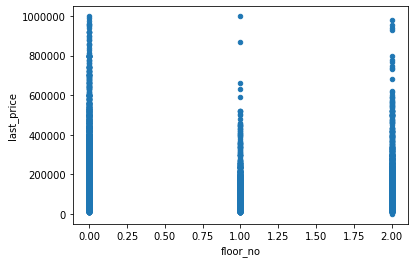

In [52]:
floor_data=data[['on_floor','last_price']]           #creating floor no column for entier city data
def number(row):
    if row=='first':
        return 1
    if row=='last':
        return 2
    return 0
floor_data['floor_no']=floor_data['on_floor'].apply(number)
floor_data.plot(y='last_price',x='floor_no',kind='scatter')

0 represents Others i.e the apartment is not on the first or the last floor
1 represents first floor
2 represents second floor
Ignoring the outlying values we see that apartments on first floor have lower price. 

# 10 localities with highest number of ads

In [53]:
#Data for 10 localities which have highest number of ads
localities=data['locality_name'].value_counts().sort_values(ascending=False)
localities=localities[0:10].to_dict()
localities

{'Saint Petersburg': 15361,
 'Murino village': 554,
 'Shushary village': 440,
 'Vsevolozhsk': 397,
 'Pushkin': 362,
 'Kolpino': 337,
 'Pargolovo village': 325,
 'Gatchina': 306,
 'Kudrovo village': 299,
 'Vyborg': 237}

In [54]:
locality_data=(data
               .query('locality_name in @localities')
               .pivot_table(index='locality_name',values='price_per_sqm'))
locality_data

,price_per_sqm
locality_name,
Gatchina,1375.153561
Kolpino,1506.665849
Kudrovo village,1849.470888
Murino village,1713.124275
Pargolovo village,1805.194865
Pushkin,2063.413986
Saint Petersburg,2241.156696
Shushary village,1573.547285
Vsevolozhsk,1373.411090


Saint Petersburg has the maximum price per sq.m and Vyborg has the lowest price per sq.m

# Studying correlations between city center data

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


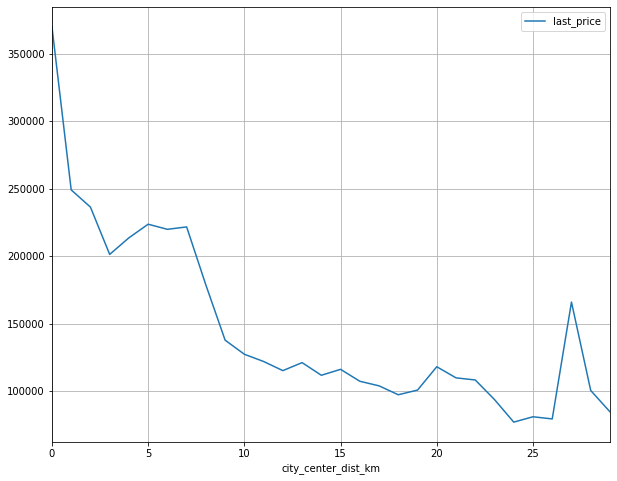

In [55]:
import matplotlib.pyplot as plt
sp_data=data.loc[data['locality_name']=='Saint Petersburg']        #data for Saint Petersburg
sp_data['city_center_dist_km']=sp_data['city_center_dist']/1000
sp_data['city_center_dist_km']=sp_data['city_center_dist_km'].round(0)
sp_price_data=sp_data.pivot_table(index='city_center_dist_km',values='last_price')

sp_price_data.plot(y='last_price',figsize=(10,8),grid=True)

plt.show()



We can say that the city center border is at 7km.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd6c46332d0>,
      dtype=object)

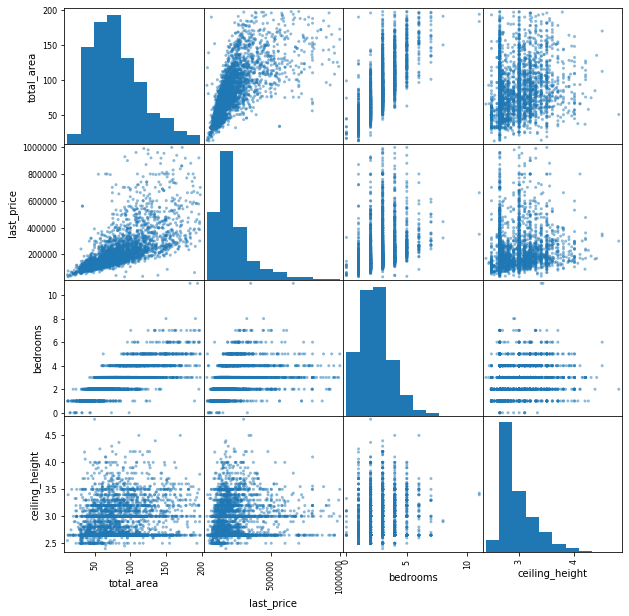

In [56]:
final_data=data.query('city_center_dist<=7000')              #city center data
final_data2=final_data[['total_area','last_price','bedrooms','ceiling_height']]
pd.plotting.scatter_matrix(final_data2,figsize=(10,10))           

The upper left cell shows a histogram of total area we can see most of the apartments have area between 25 to 125 sq.m. The cell under it shows the connection between total area and price. As total area increases price increases. but the band is very wide this is probably because a lot of other factors affect the price considerably.We see that the band of total area upto 100 sq m and price less than 200000 has become narrow as compared to the graph plotted for the original data.  

The histogram of price shows that most of the apartments are priced less than 50000 dollars. For the entire city the peak of price was at 60000(approx).

histogram of bedroom shows that most apartments have between 1 and 3 bedrooms. We also see from the graph between bedrooms and total area that as the number of bedrooms increases the total area increases.

The graph between bedrooms and price shows that as number of rooms increases the price band increases as the apartments with very low prices are not included in this data.

The graph between number of bedrooms and ceiling height shows that most of the values lie between 2.5 to 3.5 (approx). Rare values lie outside this band. The histogram for ceiling height also shows maximum frequency in this band.The same can be said about the graph between ceiling height and total area. 

In the graph between price and ceiling height we see a drop in prices at around 2.6.Then the price increases upto 800k again. 

In [57]:
final_data2.corr()                               #correlation matrix for city center data

,total_area,last_price,bedrooms,ceiling_height
total_area,1.000000,0.678505,0.776340,0.220951
last_price,0.678505,1.000000,0.369032,0.146465
bedrooms,0.776340,0.369032,1.000000,0.193594
ceiling_height,0.220951,0.146465,0.193594,1.000000


Total area and price have significant correlation. Number of bedrooms and ceiling_height do not have very high correlation with price. Total area and bedrooms also have high correlation which was expected.

In [58]:
#correlation matrix for entire city data
data[['last_price','total_area','ceiling_height','bedrooms','city_center_dist']].corr()

,last_price,total_area,ceiling_height,bedrooms,city_center_dist
last_price,1.000000,0.767421,0.404156,0.471252,-0.336159
total_area,0.767421,1.000000,0.376250,0.790419,-0.233913
ceiling_height,0.404156,0.376250,1.000000,0.201356,-0.288489
bedrooms,0.471252,0.790419,0.201356,1.000000,-0.162621
city_center_dist,-0.336159,-0.233913,-0.288489,-0.162621,1.000000


In [59]:
floor_data.corr()  #correlation between floor number and price

,last_price,floor_no
last_price,1.000000,-0.070379
floor_no,-0.070379,1.000000


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


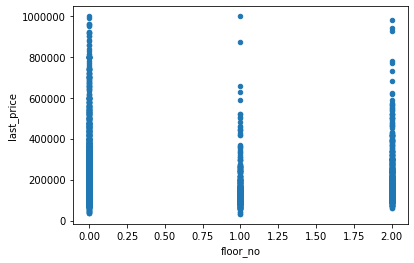

In [60]:
def floor_number(row):                     #creating column floor_no for city center data 
    if row=='first':                       #studying its effect on price in city center
        return 1
    if row=='last':
        return 2
    return 0
final_data['floor_no']=data['on_floor'].apply(floor_number)
final_data.plot(y='last_price',x='floor_no',kind='scatter')    

This graph is similar to the graph between floor number and price for the entire city. Apartments on first floor have a lower price than last floor apartments

### Step 5. Overall conclusion

Publication date: Publication date affects the price, specifically the year.Prices have increased over the years.
Number of rooms: Number of rooms appears to affect the price in city center data but not in entire city data according to the graph.Number of rooms had a low correlation with price for both the city center data and the entire city data which implies that they are not linearly related.
Ceiling Height: Ceiling height does not affect the price of an apartment, no relation can be seen in the graph.
Distance form city center: Distance from the city center affects the price of an apartment as clear from the graph but we see that the correlation value is not very high.This implies that price of an apartment and distance from the city center are not linearly related.
Floor number: Apartments on last floor have a higher price. This is same for both city cenyer data and entire city but the extent of effect is not very high.